# LAB2
## Ishwor Acharya (BL.EN.U4CSE22088)


In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
df = pd.read_excel('./Lab Session Data.xlsx', sheet_name = None)
purchase_data = df['Purchase data'].iloc[:,1:5]
purchase_data.head()

,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs)
0,20,6,2,386
1,16,3,6,289
2,27,6,2,393
3,19,1,2,110
4,24,4,2,280


In [2]:
matrix_A = np.array(purchase_data.iloc[:,:3])
matrix_C = np.array(purchase_data['Payment (Rs)'])
matrix_C = matrix_C.reshape(10,1)
print(matrix_A)
print(matrix_C)

[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
[[386]
 [289]
 [393]
 [110]
 [280]
 [167]
 [271]
 [274]
 [148]
 [198]]


In [3]:
print(np.linalg.matrix_rank(matrix_A))
print(np.linalg.matrix_rank(matrix_C))

3
1


In [4]:
inv_matrixA = np.linalg.pinv(matrix_A)
print(inv_matrixA)
cost_matrix = np.matmul(inv_matrixA, matrix_C)
print(cost_matrix)

[[-0.01008596 -0.03124505  0.01013951  0.0290728   0.0182907   0.01161794
  -0.00771348  0.00095458  0.01743623 -0.00542016]
 [ 0.09059668  0.07263726  0.03172933 -0.09071908 -0.01893196 -0.06926996
   0.05675464  0.03152577 -0.07641966  0.00357352]
 [ 0.00299878  0.15874243 -0.05795468 -0.06609024 -0.06295043  0.03348017
   0.01541831 -0.01070461  0.00029003  0.05938755]]
[[ 1.]
 [55.]
 [18.]]


In [5]:
d = {"Product": ["Candies","Mangoes","Milk Packets"],"cost": np.ndarray.tolist(cost_matrix.ravel())}
print(d)
df2 =pd.DataFrame(d)
df2

{'Product': ['Candies', 'Mangoes', 'Milk Packets'], 'cost': [1.000000000000015, 54.99999999999999, 17.999999999999996]}


,Product,cost
0,Candies,1.0
1,Mangoes,55.0
2,Milk Packets,18.0


In [6]:
purchase_data['Status'] = ['Rich' if x > 200 else 'Poor' for x in purchase_data['Payment (Rs)']]
purchase_data

,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs),Status
0,20,6,2,386,Rich
1,16,3,6,289,Rich
2,27,6,2,393,Rich
3,19,1,2,110,Poor
4,24,4,2,280,Rich
5,22,1,5,167,Poor
6,15,4,2,271,Rich
7,18,4,2,274,Rich
8,21,1,4,148,Poor
9,16,2,4,198,Poor


In [7]:
irctc = df['IRCTC Stock Price']
irctc

,Date,Month,Day,Price,Open,High,Low,Volume,Chg%
0,"Jun 29, 2021",Jun,Tue,2081.85,2092.00,2126.90,2065.05,1.67M,0.0020
1,"Jun 28, 2021",Jun,Mon,2077.75,2084.00,2112.45,2068.40,707.73K,0.0043
2,"Jun 25, 2021",Jun,Fri,2068.85,2084.35,2088.50,2053.10,475.82K,-0.0020
3,"Jun 24, 2021",Jun,Thu,2072.95,2098.00,2098.00,2066.00,541.51K,-0.0026
4,"Jun 23, 2021",Jun,Wed,2078.25,2102.00,2111.40,2072.00,809.62K,-0.0023
...,...,...,...,...,...,...,...,...,...
244,"Jul 07, 2020",Jul,Tue,1397.40,1410.00,1411.00,1390.05,480.21K,-0.0024
245,"Jul 06, 2020",Jul,Mon,1400.75,1405.50,1415.50,1394.00,614.93K,-0.0031
246,"Jul 03, 2020",Jul,Fri,1405.10,1415.00,1425.00,1398.00,599.49K,-0.0051
247,"Jul 02, 2020",Jul,Thu,1412.35,1440.00,1467.80,1395.30,2.16M,0.0362


In [8]:
price_mean = st.mean(irctc['Price'])
price_mean

1560.663453815261

In [9]:
price_variance = st.variance(irctc['Price'])
price_variance

58732.365352539186

In [10]:
weddata = irctc[ irctc['Day'] == 'Wed']['Price']
st.mean(weddata)


1550.706

In [11]:
# From the above observation the mean of wednesday data is less than population mean

In [12]:
aprdata = irctc[irctc['Month'] == 'Apr']['Price']
st.mean(aprdata)

1698.9526315789474

In [13]:
# From the above observation the mean of april data is less than population mean

In [14]:
per_change = irctc[irctc['Chg%'] < 0]
neg_change = len(per_change)
neg_change
total_len = len(irctc)

In [15]:
loss_prob = neg_change/total_len
loss_prob

0.4979919678714859

In [16]:
# Loss probability is 0.498

In [17]:
pos_per_change = len(irctc[(irctc['Day'] == 'Wed') & (irctc['Chg%'] > 0)])
pos_per_change

21

In [18]:
profit_prob = pos_per_change/total_len
profit_prob

0.08433734939759036

In [19]:
cond_prob = profit_prob * 5
cond_prob

0.4216867469879518

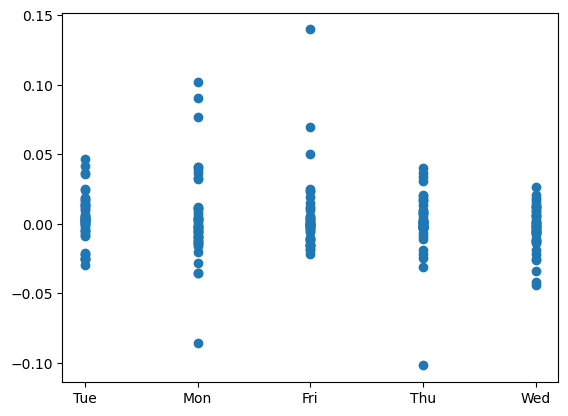

In [20]:
day_of_week = irctc['Day']
per_change = irctc['Chg%']
plt.scatter(day_of_week,per_change)